### Building a Pair Plot

This activity introduces an approach for building a pairplot.  First, the `seaborn` library is used to build pairplots.  Then, after introducing these you will explore a sample dataset to explore relationships between numeric features. 

### Seaborn: `sns.pairplot()`

Below a dataset made available by Dr. Kristen Gorman from the Palmer Station, Antarctica LTER. [more info](https://github.com/allisonhorst/palmerpenguins)  The data contain anatomical measurements of three different species of penguins from three islands on the Palmer Archipelago in Antarctica.  We will use this data to create a basic pairplot which is a grid of scatterplots comparing all quantitative features.  On the main diagonal, a histogram of each feature is drawn.  

In [2]:
import seaborn as sns

In [5]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


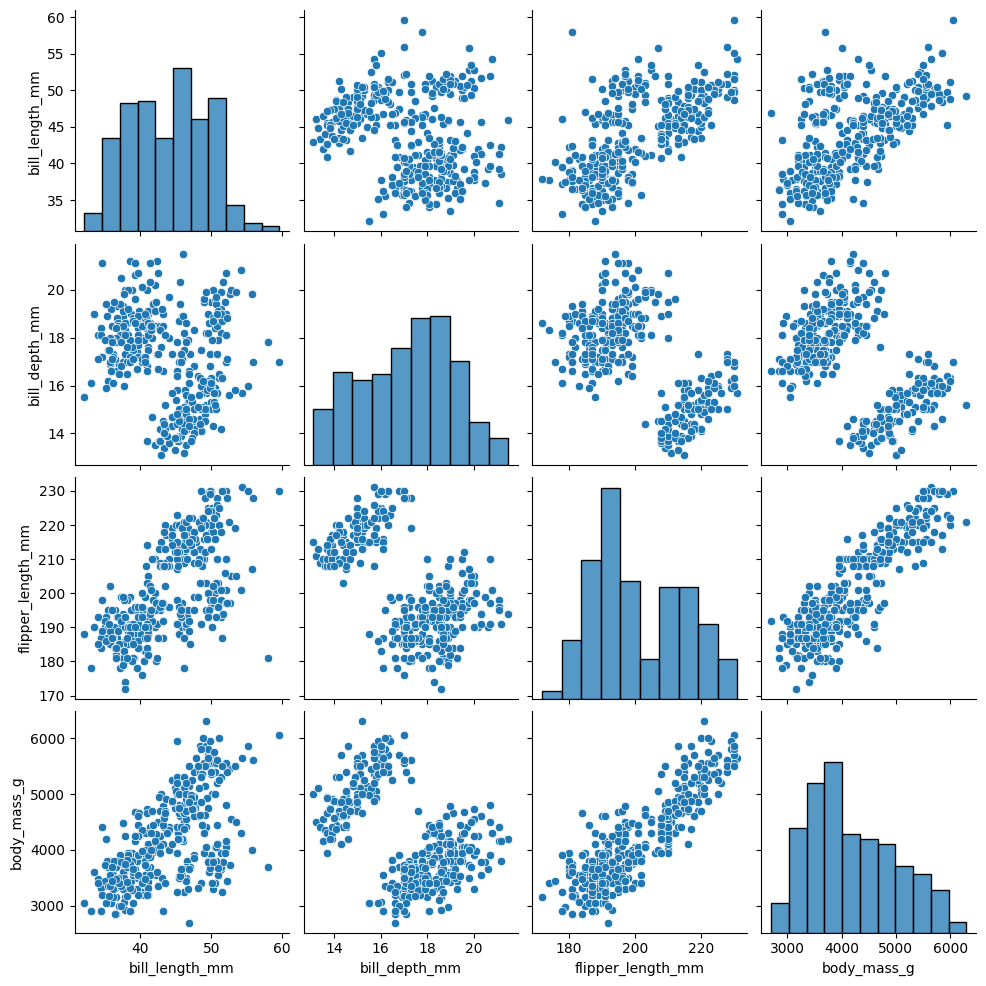

In [7]:
sns.pairplot(penguins)

#### Including Categorical Features

To label the points by a categorical feature in the data, the `hue` argument is used to specify a column to color by.  For example, setting `hue = species` will color the points by `species` and include a legend relating the color to the label. Note that the diagonal plot changes to a `kde`.  

In [15]:
display(penguins.corr(numeric_only=True))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [18]:
display(penguins.loc[penguins.species == "Gentoo"].corr(numeric_only=True))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.643384,0.661162,0.669166
bill_depth_mm,0.643384,1.000000,0.706563,0.719085
flipper_length_mm,0.661162,0.706563,1.000000,0.702667
body_mass_g,0.669166,0.719085,0.702667,1.000000


In [19]:
display(penguins.loc[penguins.species != "Gentoo"].corr(numeric_only=True))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.275384,0.504985,0.307147
bill_depth_mm,0.275384,1.000000,0.373769,0.583242
flipper_length_mm,0.504985,0.373769,1.000000,0.489713
body_mass_g,0.307147,0.583242,0.489713,1.000000


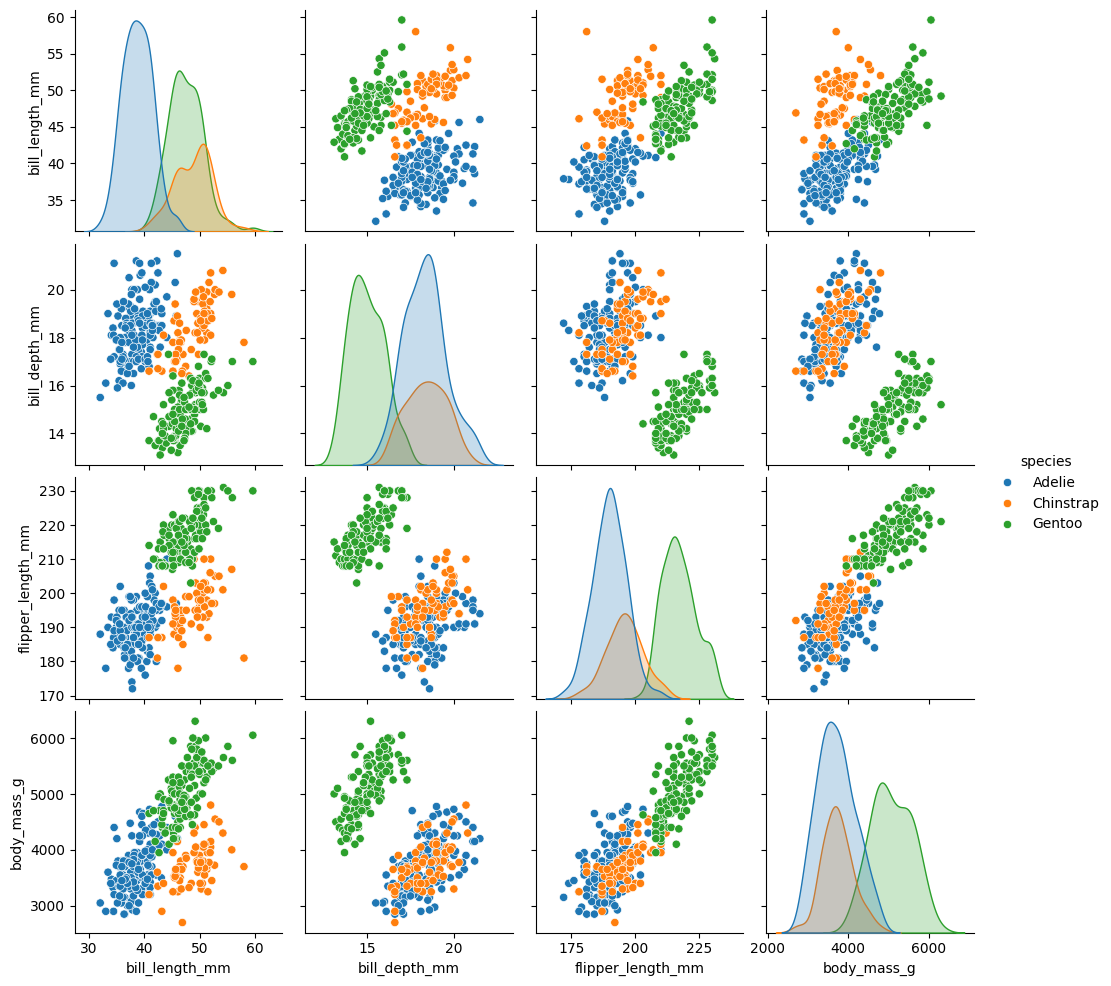

In [8]:
sns.pairplot(penguins, hue = "species")

There are many additional options available that control elements such as the kind of plot on the diagonal, color palette, and even changing the plot types off the main diagonal to be different plots.  For a deeper dive into the `.Pairgrid` see the documentation [here](https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships).

### Example: Automotive Data

Below we load a small dataset containing 32 observations on 10 automotive cars.  The features are:

```
mpg     Miles/(US) gallon
cyl     Number of cylinders
disp     Displacement (cu.in.)
hp     Gross horsepower
drat     Rear axle ratio
wt     Weight (1000 lbs)
qsec     1/4 mile time
vs     Engine (0 = V-shaped, 1 = straight)
am     Transmission (0 = automatic, 1 = manual)
gear     Number of forward gears
carb     Number of carburetors
```

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('data/cars.csv')

In [22]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Below, we create a dataframe considering the numeric features:

```python
['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']
```

and add a single categorical feature `vs`.  Your task is to use a `sns.pairplot()` to explore the relationships between features and which are capable of separating the categorical features:

```python
'vs', 'am', 'gear', 'carb', 'cyl'
```

Report back on your findings, specifically what relationships you are able to uncover using the pairplot on the auto data.

In [23]:
#create a DataFrame from floats
#and add a categorical feature "vs"
s1 = pd.concat((df[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']], df[['vs']]), axis = 1)

In [27]:
s1.head()
display(s1.corr())

,mpg,disp,hp,drat,wt,qsec,vs
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535
vs,0.664039,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000


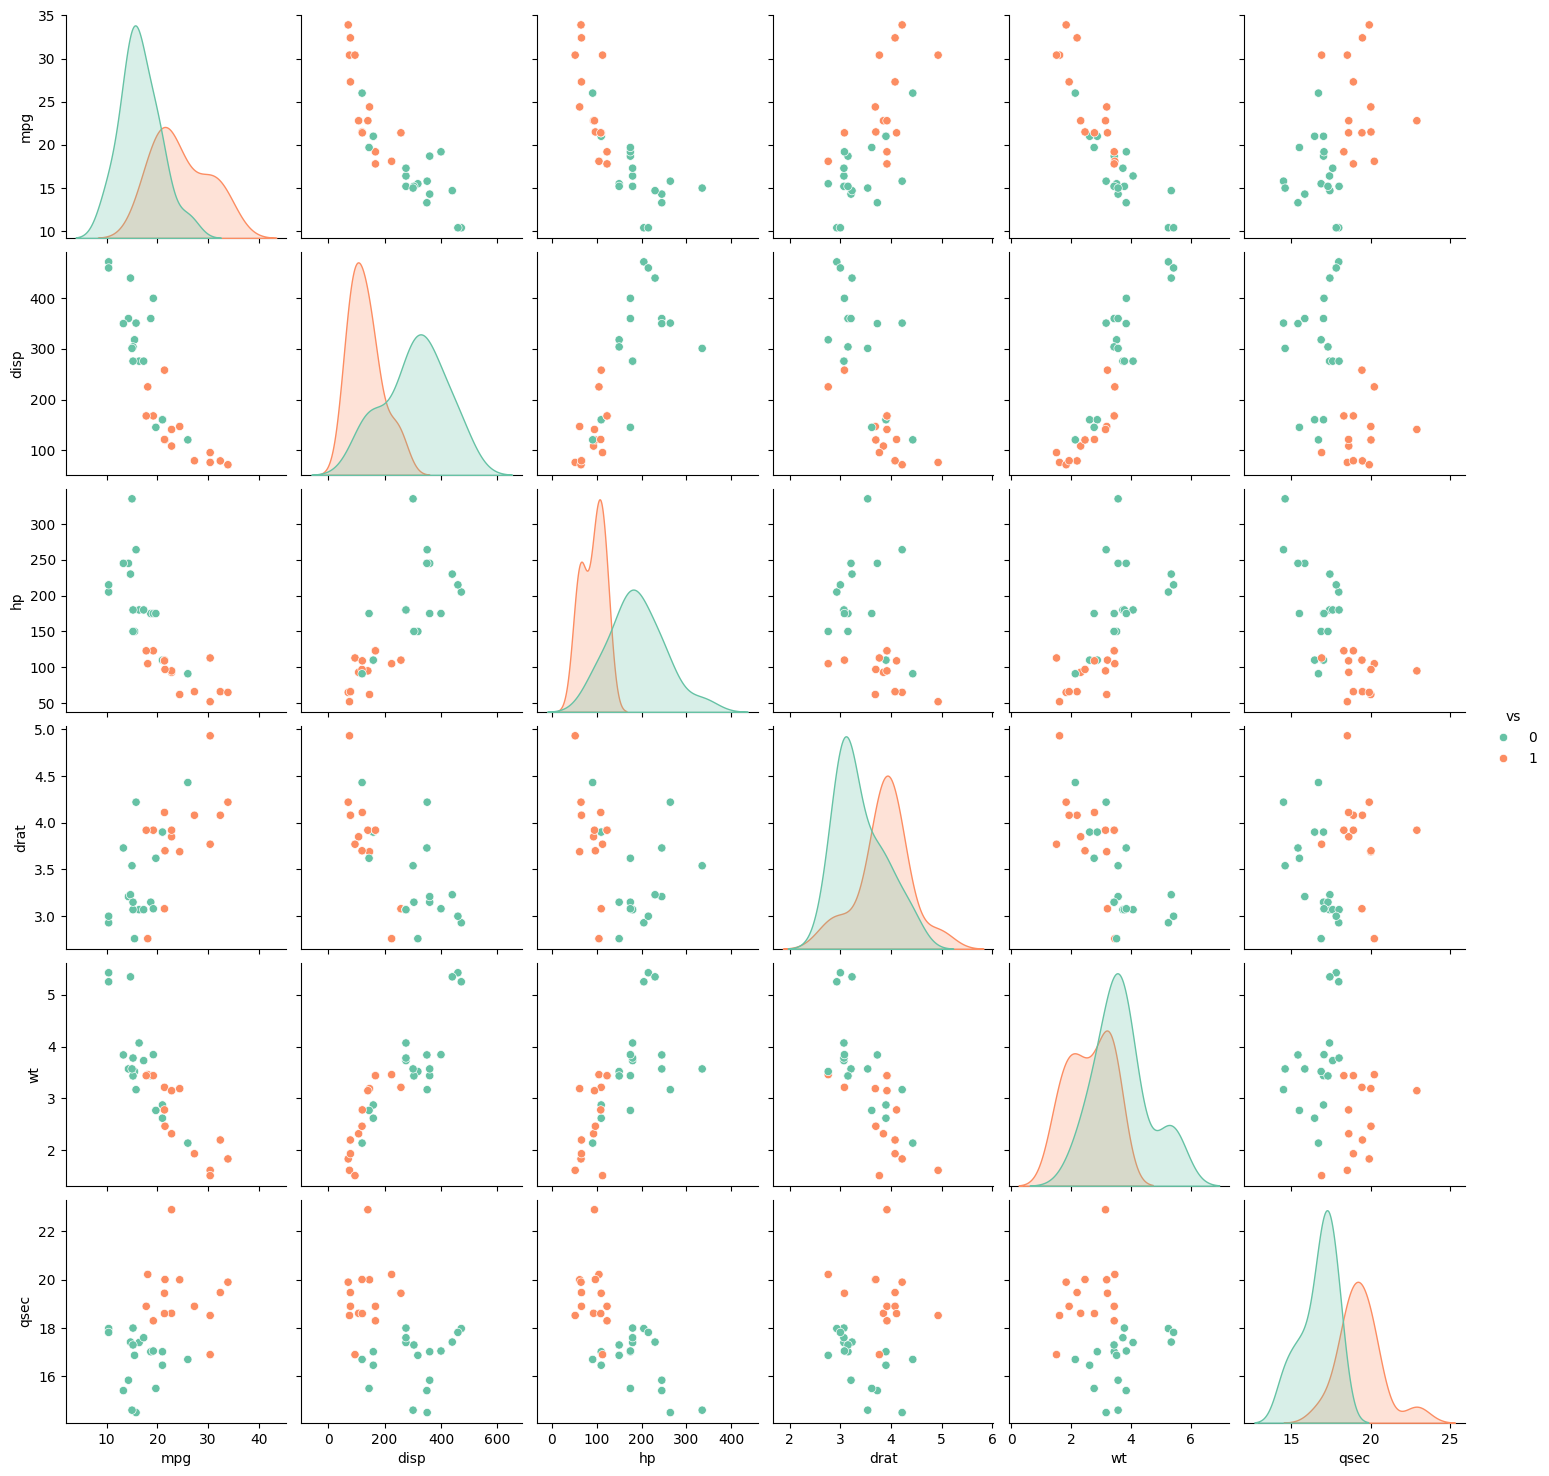

In [25]:
sns.pairplot(s1, hue = 'vs', palette = "Set2")